## idea

random forest is similar to bagging, but take averaging idea further,

it average **uncorrelated** things to decrease variance and error

difference: after obtain $B$ bootstrap samples, it randomly choose $m$ out of $p$ predictors at each split, to reduce dependency of each tree/to **decorrelate** predictors

from the figure, we can see when $m$ ↑, the correlation between random forest bagged trees also ↑, so often $m$ is very small, e.g, 3, 5

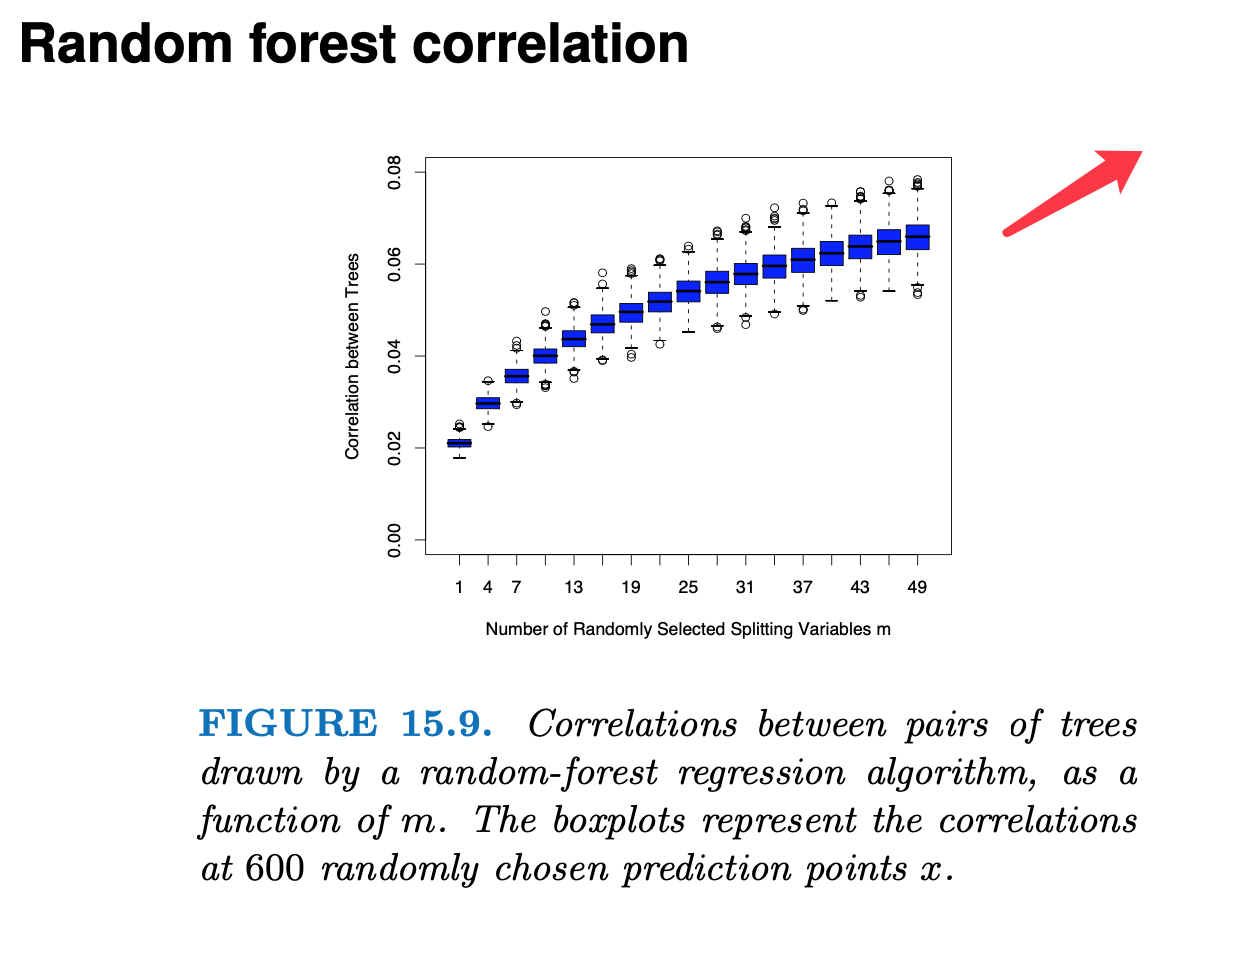

## algorithm

Training

- original training set $Z$ has $n$ observations.

1. for $b=1,.., B$

   - **bootstrap sampling**: randomly uniformly sample $n$ observs from $Z$ **with replacement** (observ can repeat) to obtain $B$ bootstrap samples, called $Z^{*1}, Z^{*2},...,Z^{*B}$

   - for each bootstrap sample $Z^{*b}$, grow a tree without pruning: $T_b$

      - **split-variable sampling**: randomly choose $m$ out of $p$ predictors ($m$ is fixed)

      - pick best split-point among $m$ predictors

      - split the node into 2 children nodes

2. output the ensemble of B trees $\left\{T_b\right\}_{b=1}^B=\left\{T_1, ..., T_B\right\}$


Testing   

for make prediction at a new data point $x$, 

- regression: take an average to be the predicted value

$$
\hat f(x)=\frac{1}{B}\sum_{b=1}^B T_b(x)
$$

- classification: take the majority vote to be the predicted value

$$
\hat f(x)= \underset{k}{\arg\max}\frac{\mathbb{1}(T_b(x)=k)}{B}
$$

## recommended hyperparameter

$p$ is the number of total predictors

- for classification

    - $m = \left \lfloor \sqrt{p} \right \rfloor$
    
    - minimum node size = 1


- for regression

   - $m=\left \lfloor \frac{p}{3} \right \rfloor$
   
   - minimum node size = 5

## out-of-bag prediction

like bagging, can use the out-of-bag observ ($\frac{1}{3}$ of total data points)

cross-validation can be performed along the way:

- training set: bootstrap sample $Z^{*b}$

- validation set: unused observs $z_1=(x_1, y_1),...,$

## bias-variance trade-off

right plot is random forest ensemble

left vertical axis: mean square error(MSE) & bias

right vertical axis: variance

we can see as m ↑, variance  ↑ and bias ↓ show a bias-variance trade-off

while MSE first ↓ then ↑, optimal $m=5$

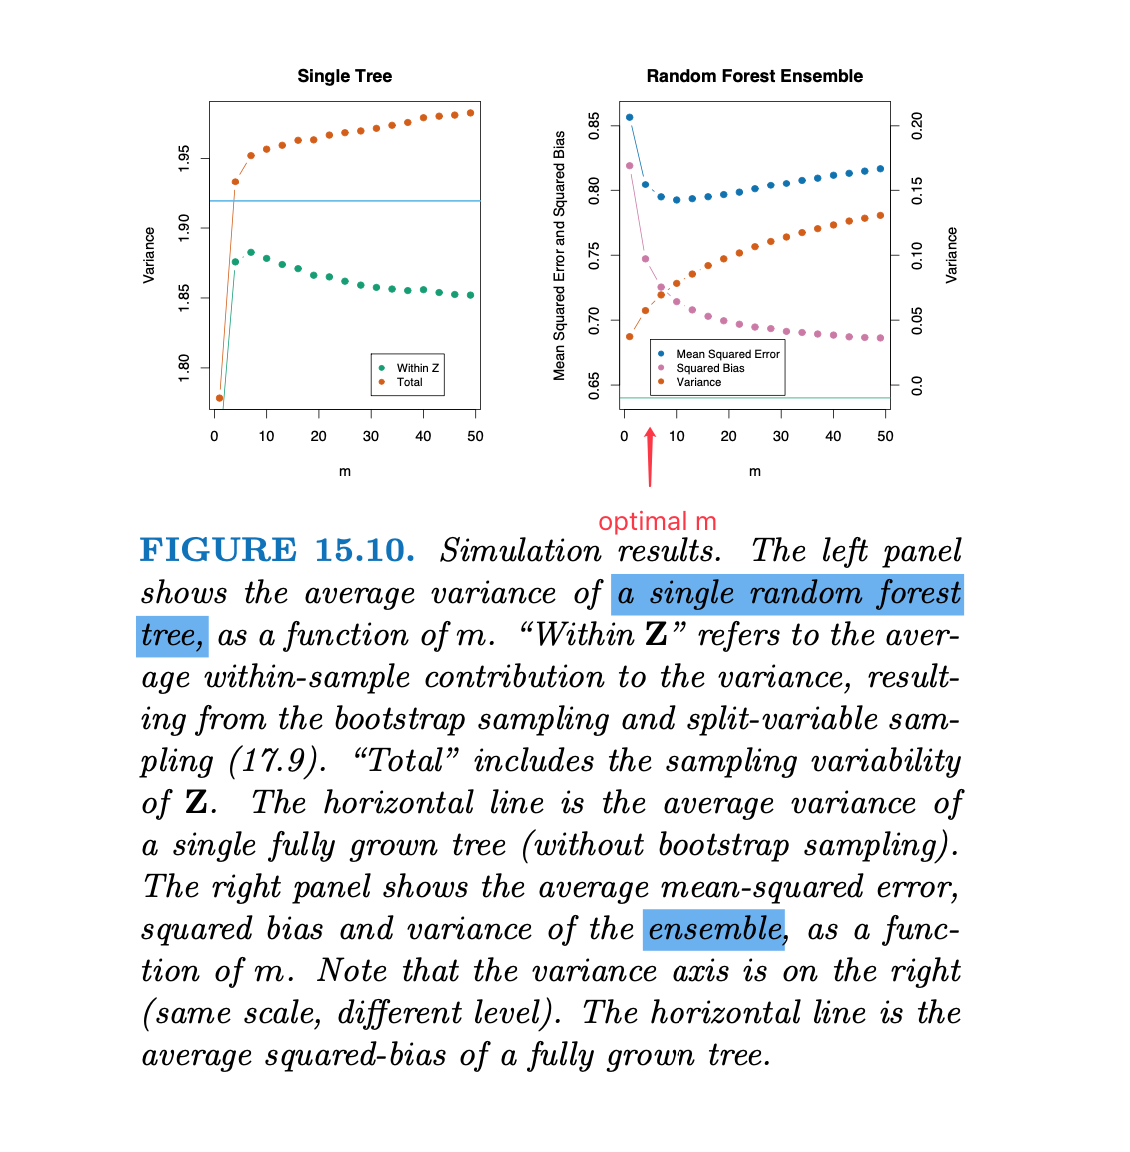